In [1]:
# Concept from LangChain: https://python.langchain.com/en/latest/use_cases/agent_simulations/two_player_dnd.html
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))

In [2]:
from srv.chatlibs.dialogue_agent import DialogueAgent

In [3]:
from srv.chatlibs.dialogue_sim import DialogueSimulator

In [4]:
from srv.chatlibs.image_generator2 import ImageGenerator

In [5]:
from dotenv import load_dotenv, find_dotenv

In [6]:
load_dotenv(find_dotenv())

True

In [7]:
from langchain.schema import (
    HumanMessage,
    SystemMessage,
)

In [8]:
from langchain.chat_models import ChatOpenAI

In [9]:
from IPython import display

===== Init Lang Vars =====

In [10]:
# system message for story teller (dungeon master)
# (using HumanMessage)
protagonist_name = "Ninja 1"
storyteller_name = "Dungeon Master"
quest = """Defeat the Legendary 13 Tail Monster to free the village of the fate of obliteration. 
This is a Naruto themed quest set in a Naruto-themed village in a large world consisting of many ninja villages spanning across 9 continents."""
word_limit = 50

game_description = f"""Here is the topic for a Dungeons & Dragons game: {quest}.
        There is one player in this game: the protagonist, {protagonist_name}.
        The story is narrated by the storyteller, {storyteller_name}."""

game_description

'Here is the topic for a Dungeons & Dragons game: Defeat the Legendary 13 Tail Monster to free the village of the fate of obliteration. \nThis is a Naruto themed quest set in a Naruto-themed village in a large world consisting of many ninja villages spanning across 9 continents..\n        There is one player in this game: the protagonist, Ninja 1.\n        The story is narrated by the storyteller, Dungeon Master.'

In [11]:
game_message_desc = HumanMessage(content=
            f"""{game_description}
Please reply with a creative description of the storyteller, {storyteller_name}, in {word_limit} words or less. 
Speak directly to {storyteller_name}.
Do not add anything else.
""")
game_message_desc

HumanMessage(content='Here is the topic for a Dungeons & Dragons game: Defeat the Legendary 13 Tail Monster to free the village of the fate of obliteration. \nThis is a Naruto themed quest set in a Naruto-themed village in a large world consisting of many ninja villages spanning across 9 continents..\n        There is one player in this game: the protagonist, Ninja 1.\n        The story is narrated by the storyteller, Dungeon Master.\nPlease reply with a creative description of the storyteller, Dungeon Master, in 50 words or less. \nSpeak directly to Dungeon Master.\nDo not add anything else.\n', additional_kwargs={}, example=False)

In [12]:
player_descriptor_system_message = SystemMessage(
    content="You can add detail to the description of a Dungeons & Dragons player.")
player_descriptor_system_message

SystemMessage(content='You can add detail to the description of a Dungeons & Dragons player.', additional_kwargs={})

In [13]:
prompts = []
prompts.append(player_descriptor_system_message)
prompts.append(game_message_desc)

In [14]:
prompts

[SystemMessage(content='You can add detail to the description of a Dungeons & Dragons player.', additional_kwargs={}),
 HumanMessage(content='Here is the topic for a Dungeons & Dragons game: Defeat the Legendary 13 Tail Monster to free the village of the fate of obliteration. \nThis is a Naruto themed quest set in a Naruto-themed village in a large world consisting of many ninja villages spanning across 9 continents..\n        There is one player in this game: the protagonist, Ninja 1.\n        The story is narrated by the storyteller, Dungeon Master.\nPlease reply with a creative description of the storyteller, Dungeon Master, in 50 words or less. \nSpeak directly to Dungeon Master.\nDo not add anything else.\n', additional_kwargs={}, example=False)]

In [15]:
c = ChatOpenAI(temperature=1.0)(prompts).content
c

'Dungeon Master, you are the weaver of tales, the bringer of adventure, and the master of the game. Your voice booms with excitement and intensity as you guide Ninja 1 through the dangerous yet thrilling world of the Naruto universe. Will you be the one to guide Ninja 1 to victory?'

In [16]:
generator = ImageGenerator(
        os.environ.get("IMAGE_GENERATION_API_URL"),
        ChatOpenAI(temperature=0.8)
                          )

===== 1. Init Quest Specific Description, Gen Quest Image =====

In [ ]:
# 1a. Generate Specific Quest

In [17]:
questspecifics = ChatOpenAI(temperature=1.0)(

    [
        SystemMessage(content="You can make a task more specific."),
        HumanMessage(content=
            f"""{game_description}
            
            You are the storyteller, {storyteller_name}.
            Please make the quest more specific. Be creative and imaginative.
            Please reply with the specified quest in {word_limit} words or less. 
            Speak directly to the protagonist {protagonist_name}.
            Do not add anything else."""
            )
    ]

)

questspecifics.content

'Ninja 1, you must retrieve the Seal of the 13 Tails from the Forbidden Forest before the legendary monster awakens. You have three days to find it and defeat the monster, or the village will be destroyed. Be warned, the forest is guarded by powerful creatures and your actions have consequences.'

In [18]:
# 1b. Get Image Prompt for Quest Specifc
imageprompt = generator.generate_image_prompt(protagonist_name, questspecifics.content)
# note: character name is appended with "from rick and morty"
imageprompt

"A painting of the Ninja 1 from the Universe of Naruto, with the Seal of the 13 Tails clutched tightly in hand, sneaking cautiously through the twisted trees of the Forbidden Forest. The air is thick with tension, and every rustle of leaves sends shivers down Ninja 1's spine. Suddenly, a powerful creature leaps out from the shadows, ready to attack."

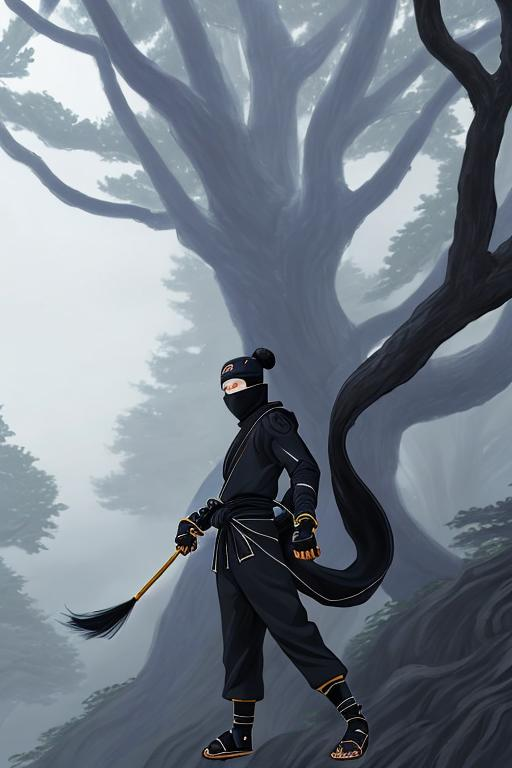

In [19]:
# 1c. Generate image for Quest Specific
questImage64 = generator.generate_image(imageprompt)
display.Image(questImage64)

===== 2. Create Characters =====

In [20]:
# 2a create Dungeon Master
prompts = []
prompts.append(player_descriptor_system_message)
prompts.append(
    HumanMessage(content=f"""{game_description}
Please reply with a creative description of the storyteller, {storyteller_name}, in {word_limit} words or less. 
Speak directly to {storyteller_name}.
Do not add anything else.
""")
)

dm_system_message = ChatOpenAI(temperature=1.0)(prompts).content
print(dm_system_message)

dm_agent = DialogueAgent(
    name=storyteller_name,
    system_message=dm_system_message,
    model=ChatOpenAI(temperature=0.2)
)

print()
print()
print(dm_agent.model)

Dungeon Master, you are the mastermind behind the story - a creative and imaginative storyteller who knows just how to weave an intricate tale that keeps Ninja 1 on the edge of their seat. Your voice is commanding, your descriptions vivid, and your world-building unparalleled.


verbose=False callbacks=None callback_manager=None client=<class 'openai.api_resources.chat_completion.ChatCompletion'> model_name='gpt-3.5-turbo' temperature=0.2 model_kwargs={} openai_api_key=None openai_api_base=None openai_organization=None request_timeout=None max_retries=6 streaming=False n=1 max_tokens=None


In [21]:
# 2b. create Protoganist

prompts = []
prompts.append(player_descriptor_system_message)
prompts.append(
    HumanMessage(content=
            f"""
{game_description}
Please reply with a creative description of the protagonist, {protagonist_name}, in {word_limit} words or less. 
Speak directly to {protagonist_name}.
Do not add anything else.            
""")
)

protoganist_system_message = ChatOpenAI(temperature=1.0)(prompts).content
print(protoganist_system_message)


protoganist_agent = DialogueAgent(
    name=storyteller_name,
    system_message=protoganist_system_message,
    model=ChatOpenAI(temperature=0.2)
)


print()
print()
print(protoganist_agent.model)

"Ninja 1, you emanate a quiet confidence that draws others towards you. Underneath the cool exterior is a powerful will, honed by years of arduous training. You possess an unwavering sense of duty towards your village - and the fate of your people rests on your shoulders today."


verbose=False callbacks=None callback_manager=None client=<class 'openai.api_resources.chat_completion.ChatCompletion'> model_name='gpt-3.5-turbo' temperature=0.2 model_kwargs={} openai_api_key=None openai_api_base=None openai_organization=None request_timeout=None max_retries=6 streaming=False n=1 max_tokens=None


In [22]:
# 2c. init Dialogue Sim
# Dialogue Sim Object here just provides a function to inject replied story message to Agents in Character List
character_list = [dm_agent, protoganist_agent]
simulator = DialogueSimulator(character_list)

===== 3. Start Convos =====

In [23]:
# 3a. Inject Specific Quest To Start
simulator.reset()
simulator.inject(storyteller_name, questspecifics.content)
questspecifics.content

'Ninja 1, you must retrieve the Seal of the 13 Tails from the Forbidden Forest before the legendary monster awakens. You have three days to find it and defeat the monster, or the village will be destroyed. Be warned, the forest is guarded by powerful creatures and your actions have consequences.'

In [24]:
simulator.agents[0].message_history

['Here is the conversation so far.',
 'Dungeon Master: Ninja 1, you must retrieve the Seal of the 13 Tails from the Forbidden Forest before the legendary monster awakens. You have three days to find it and defeat the monster, or the village will be destroyed. Be warned, the forest is guarded by powerful creatures and your actions have consequences.']

In [25]:
# Convo here is altered to start with User/Protoganist so that
# DM can reply its reaction
# 1st Inject Dialogue Sim with User message 
# Then 2nd Inject Dialogue Sim with 
simulator.inject(protagonist_name, "I am ready. First what items are in my travel bag?")
responded_narrative = dm_agent.send() # send will feed entire message history so far so that AI completes the rest

simulator.inject(storyteller_name, responded_narrative)

responded_narrative

'Your travel bag contains a grappling hook, a set of throwing knives, a small vial of healing potion, a map of the Forbidden Forest, and a compass. Use them wisely, Ninja 1. The forest is treacherous and full of surprises.'

In [26]:
# Convo here is altered to start with User/Protoganist so that
# DM can reply its reaction
# 1st Inject Dialogue Sim with User message 
# Then 2nd Inject Dialogue Sim with 
simulator.inject(protagonist_name, "And what skill or Jitsu do I know?")
responded_narrative = dm_agent.send() # send will feed entire message history so far so that AI completes the rest

simulator.inject(storyteller_name, responded_narrative)

responded_narrative

'You are skilled in the art of stealth and can move silently through the forest. You also have knowledge of the Shadow Clone Jutsu, which allows you to create multiple copies of yourself to confuse and distract your enemies. Use your skills and Jutsu wisely, Ninja 1. The fate of the village rests on your success.'

In [27]:
# Convo here is altered to start with User/Protoganist so that
# DM can reply its reaction
# 1st Inject Dialogue Sim with User message 
# Then 2nd Inject Dialogue Sim with 
simulator.inject(protagonist_name, "What rank of ninja am I?")
responded_narrative = dm_agent.send() # send will feed entire message history so far so that AI completes the rest

simulator.inject(storyteller_name, responded_narrative)

responded_narrative

'You are a highly skilled and experienced ninja, ranked as a Jōnin. You have been chosen for this mission because of your exceptional abilities and bravery. But even the most skilled ninja can fall in the face of danger, so be cautious and stay alert at all times. Good luck, Ninja 1. The fate of the village is in your hands.'

In [28]:
# Convo here is altered to start with User/Protoganist so that
# DM can reply its reaction
# 1st Inject Dialogue Sim with User message 
# Then 2nd Inject Dialogue Sim with 
simulator.inject(protagonist_name, "Alright. I hurry off into the forest insearch for the 13 Tail. But who do I see first?")
responded_narrative = dm_agent.send() # send will feed entire message history so far so that AI completes the rest

simulator.inject(storyteller_name, responded_narrative)

responded_narrative

'As you make your way deeper into the forest, you come across a group of bandits who are blocking your path. They are armed with swords and seem to be looking for trouble. What do you do, Ninja 1?'

In [29]:
# Convo here is altered to start with User/Protoganist so that
# DM can reply its reaction
# 1st Inject Dialogue Sim with User message 
# Then 2nd Inject Dialogue Sim with 
simulator.inject(protagonist_name, "Since I just started off, I should have enough energy and Chakra to fight these bandits. Let me use my Shadow Clone Jutsu to fight them. How many clones did I make?")
responded_narrative = dm_agent.send() # send will feed entire message history so far so that AI completes the rest

simulator.inject(storyteller_name, responded_narrative)

responded_narrative

'You create three shadow clones, each one identical to you in appearance and abilities. The bandits are taken aback by the sudden appearance of multiple ninjas and are momentarily stunned. This gives you and your clones the opportunity to attack. Roll the dice to determine the success of your attack.'

===== 4. Print Diagnostics =====

In [30]:
simulator.agents[0].message_history

['Here is the conversation so far.',
 'Dungeon Master: Ninja 1, you must retrieve the Seal of the 13 Tails from the Forbidden Forest before the legendary monster awakens. You have three days to find it and defeat the monster, or the village will be destroyed. Be warned, the forest is guarded by powerful creatures and your actions have consequences.',
 'Ninja 1: I am ready. First what items are in my travel bag?',
 'Dungeon Master: Your travel bag contains a grappling hook, a set of throwing knives, a small vial of healing potion, a map of the Forbidden Forest, and a compass. Use them wisely, Ninja 1. The forest is treacherous and full of surprises.',
 'Ninja 1: And what skill or Jitsu do I know?',
 'Dungeon Master: You are skilled in the art of stealth and can move silently through the forest. You also have knowledge of the Shadow Clone Jutsu, which allows you to create multiple copies of yourself to confuse and distract your enemies. Use your skills and Jutsu wisely, Ninja 1. The fate